In [6]:
#import the necesecary libraries
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df_iris = pd.read_csv(r"C:\Users\Alex Sameri\Desktop\data_science_projects\CODES\CSVS\Iris.csv")
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#checking for null values
df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df_iris1 = df_iris.drop(['Id'], axis=1)
df_iris1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df_iris1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df_iris1.groupby('Species').agg(['mean','median'])

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                         mean median         mean median          mean median   
Species                                                                         
Iris-setosa             5.006    5.0        3.418    3.4         1.464   1.50   
Iris-versicolor         5.936    5.9        2.770    2.8         4.260   4.35   
Iris-virginica          6.588    6.5        2.974    3.0         5.552   5.55   

                PetalWidthCm         
                        mean median  
Species                              
Iris-setosa            0.244    0.2  
Iris-versicolor        1.326    1.3  
Iris-virginica         2.026    2.0

In [12]:
df_iris1.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [13]:
df_iris1.shape

(150, 5)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

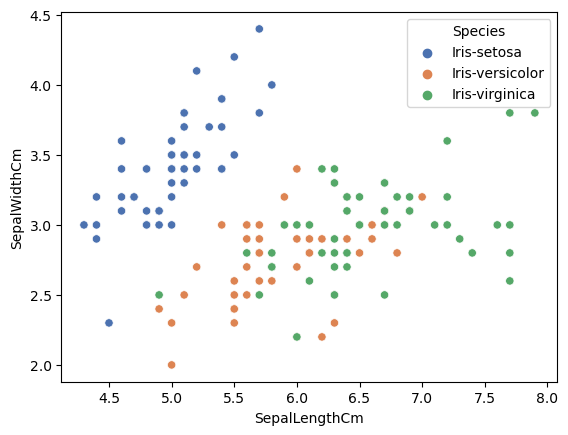

In [14]:
import seaborn as sns
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df_iris1, hue="Species", palette="deep")

In [15]:
df_iris1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_iris1['Species']=le.fit_transform(df_iris1['Species'])
df_iris1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
data = df_iris1.iloc[:,:4] #input features

target= df_iris1.iloc[:, 4] #target feature

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(data, target, train_size=0.7)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [20]:
pred =knn.predict(X_test)
pred

array([0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 2, 2, 0,
       0])

In [21]:
#calculating the model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred)*100

95.55555555555556